# Chapter 3: Decorrelating your data and Dimension Reduction

## What is Dimension Reduction?

* More efficient storage and computation
* Remove less-informative and "noisy" features from a dataset
* Remove problematic features that cause problems in classification, regression, etc.

## Principal Component Analysis (PCA)

* It is a fundamental dimension reduction technique
* First step: Decorrelation
* Second step: Dimension Reduction

### Decorrelation: Data and axes alignment

* PCA aligns data with axes
* Rotates data samples to be aligned with axes
* Shifts data so they have 0 mean

![pca data axes alignment](./images/pca_data_axes_alignment.jpg "pca data axes alignment")

### PCA follows the fit/transform pattern

* PCA is a `scikit-learn` component like `KMeans` or `StandardScaler`
* `fit()` learns the transformation from given data
* `transform()` applies the learned transformation
* `transform()` can also be applied to new data

In [2]:
# starter code

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.set_option('display.expand_frame_repr', False)

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
plt.style.use('ggplot')

In [3]:
# Piedmont wines dataset

samples = pd.read_csv("datasets/piedmont_wine_data.csv",header=0).iloc[:,[7,13]].values
varieties = pd.read_csv("datasets/piedmont_wine_data.csv",header=0).iloc[:,0]

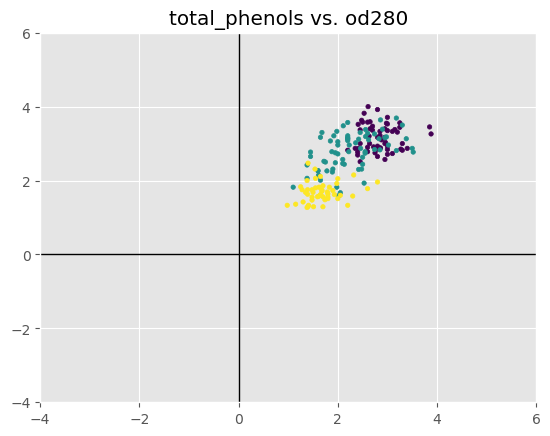

In [4]:
# Plot non-transformed features

plt.scatter(samples[:,0],samples[:,1],c=varieties,s=10);
plt.xlim((-4,6))
plt.ylim((-4,6))
# Draw lines to split quadrants
plt.plot([0,0],[-4,6], linewidth=1, color='black' )
plt.plot([-4,6],[0,0], linewidth=1, color='black' )
plt.title('total_phenols vs. od280');

In [5]:
# Using scikit-learn PCA

from sklearn.decomposition import PCA
model = PCA()
model.fit(samples)
transformed = model.transform(samples)
print(transformed[:3])

[[-1.32771994  0.45139607]
 [-0.83249607  0.23309966]
 [-0.75216868 -0.02947892]]


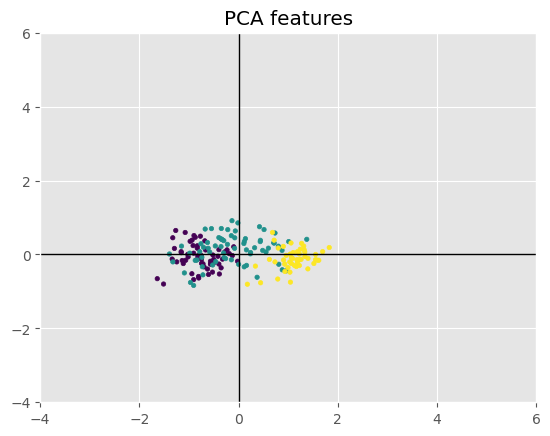

In [6]:
# Plot transformed features

plt.scatter(transformed[:,0],transformed[:,1],c=varieties,s=10);
plt.xlim((-4,6))
plt.ylim((-4,6))
# Draw lines to split quadrants
plt.plot([0,0],[-4,6], linewidth=1, color='black' )
plt.plot([-4,6],[0,0], linewidth=1, color='black' )
plt.title('PCA features');

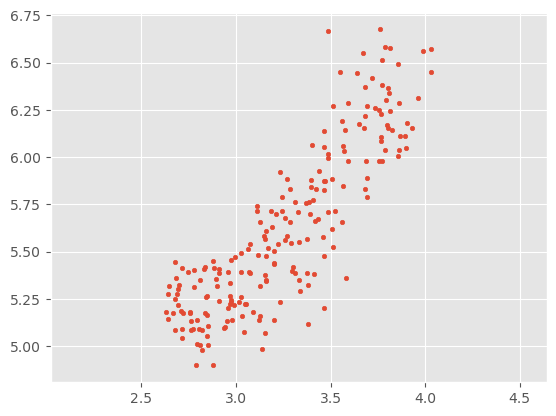

0.8604149377143469


In [7]:
# Grain/Seed dataset

grains = pd.read_csv("datasets/seeds_dataset.csv",header=None,usecols=[3,4])[[4,3]].values

# Correlated data in nature

# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = grains[:,0]

# Assign the 1st column of grains: length
length = grains[:,1]

# Scatter plot width vs length
plt.scatter(width, length, s=10)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width,length)

# Display the correlation
print(correlation)

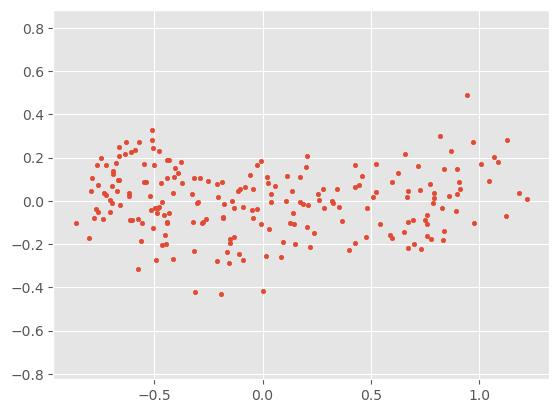

-4.163336342344337e-17


In [8]:
# Decorrelating the grain measurements with PCA

# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys, s=10)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

## Intrinsic Dimension

* Intrinsic Dimension: number of features needed to approximate the dataset (number of features with significant variance)
* It is the essential idea behind dimension reduction
* Tells how much of the data can be compressed

### Example: Versicolor Dataset

* "versicolor", one of the Iris Dataset species
* Only 3 features: sepal length, sepal width, petal width
* Samples are points in 3D space
* But, if we make a 3D representation of the samples, we see that they all lie in a 2D space:

![versicolor samples 3D](./images/versicolor_samples_3d.jpg "versicolor samples 3D")

This means that we can drop 1 of the features.

Now, let's see what happens when PCA is applied to the versicolor samples:

![versicolor samples 3D with PCA](./images/versicolor_samples_3d_with_pca.jpg "versicolor samples 3D with PCA")

Let's see the ordering of the PCA features by variance:

![versicolor samples 3D with PCA ordering](./images/versicolor_samples_3d_with_pca_ordering.jpg "versicolor samples 3D with PCA ordering")

### Let's see the example in code!

In [9]:
# Versicolor dataset

data = pd.read_csv("datasets/iris_data.csv")
versicolor = data[data['class']=='versicolor']
x = versicolor['sepal_length']
y = versicolor['sepal_width']
z = versicolor['petal_width']

C:\Users\Paul Isaris\AppData\Local\Temp\ipykernel_2956\3955030999.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, z, cmap='viridis', linewidth=0.5);


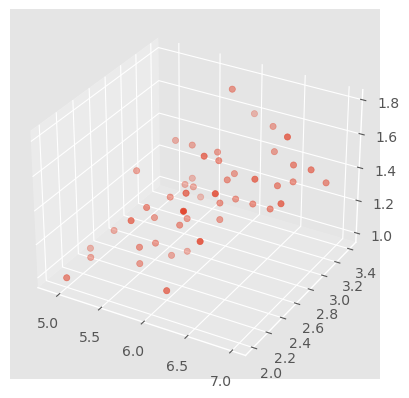

In [10]:
# 3D scatter plot of Versicolor dataset

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, cmap='viridis', linewidth=0.5);

In [11]:
# PCA of the versicolor samples

samples = versicolor.iloc[:,[0,1,3]].values

In [12]:
# Import PCA
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(samples)

PCA()

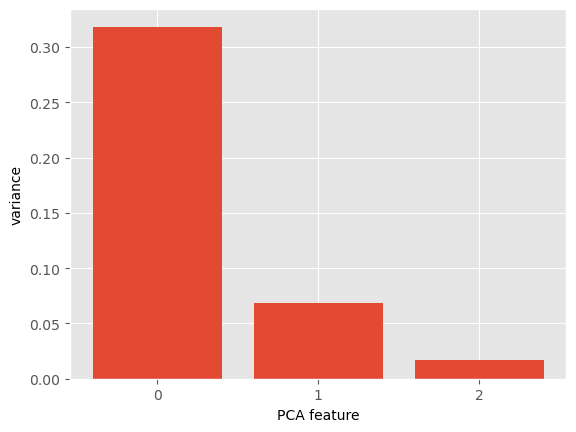

In [13]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

In [14]:
# Grain/Seed dataset
grains = pd.read_csv("datasets/seeds_dataset.csv",header=None,usecols=[3,4])[[4,3]].values

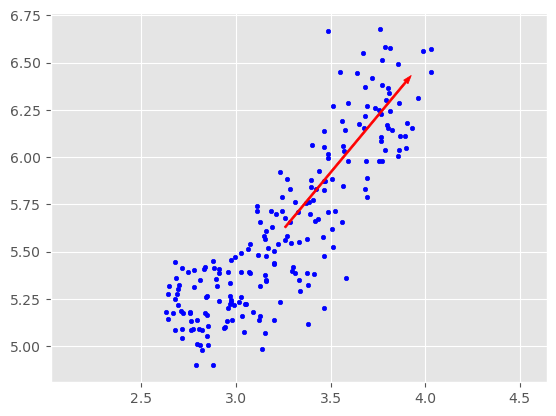

In [15]:
# The first principal component

# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1],c='blue',s=10)

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

In [16]:
# Fish dataset

data = pd.read_csv("datasets/fish_catch.csv",header=None).dropna()
species = list(data[0].map({1:'Bream',2:'Whitewish',3:'Roach',4:'?',5:'Smelt',6:'Pike',7:'Perch'}))
samples = data.iloc[:,1:].values

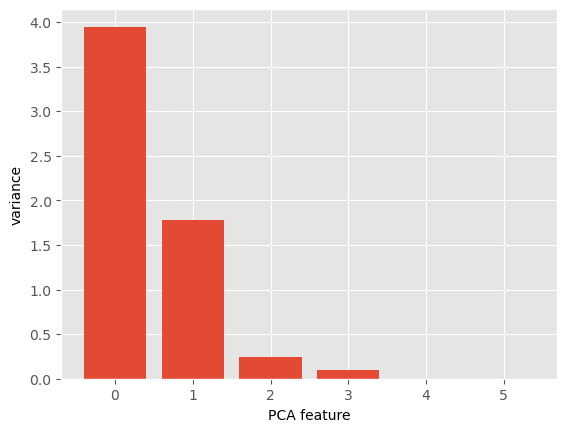

In [17]:
# Variance of the PCA features

# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

## Dimension reduction with PCA

Represents same data, using less features

Important part of machine-learning pipelines

Can be performed using PCA

Let's see a simple example, using the Iris dataset:

In [19]:
from sklearn.datasets import load_iris

# Iris dataset
samples = load_iris()['data']
species = load_iris()['target']

In [20]:
# Dimension reduction of iris dataset

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(samples)

PCA(n_components=2)

In [21]:
transformed = pca.transform(samples)
print(transformed.shape)

(150, 2)


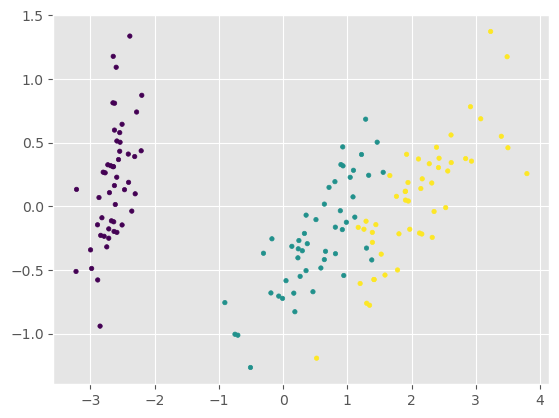

In [22]:
# Iris dataset in 2 dimensions

import matplotlib.pyplot as plt
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs, ys, c=species, s=10)
plt.show()

As we can see from the plot above:

* PCA has reduced the dimension to `2`, as expected
* PCA retained the 2 PCA features with the highest variance
* Important information preserved: species remain distinct families

### Sparse arrays and csr_matrix

"Sparse" Array: most entries are zero  


* Can use `scipy.sparse.csr_matrix` instead of `NumPy` array  
  
* `csr_matrix` remembers only the non-zero entries (saves space!)  

* `scikit-learn` PCA doesn't support `csr_matrix`  

* Use `scikit-learn` `TruncatedSVD` instead  

* Performs same transformation

In [24]:
# Fish dataset scaled
data = pd.read_csv("datasets/fish_catch.csv",header=None).dropna()
species = list(data[0].map({1:'Bream',2:'Whitewish',3:'Roach',4:'?',5:'Smelt',6:'Pike',7:'Perch'}))
samples = data.iloc[:,0:].values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_samples = scaler.fit_transform(samples)

In [25]:
# Dimension reduction of the fish measurements

# Import PCA
from sklearn.decomposition import PCA

# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)

(85, 2)


### TF-IDF

In [26]:
# TF-IDF toy collection of documents
documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']

In [29]:
# A tf-idf word-frequency array

# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer() 

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names_out()

# Print words
print(words)

[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats' 'chase' 'dogs' 'meow' 'say' 'woof']


### Wikipedia dataset Exercise

To preprocess `wikipedia-vectors.csv` into the format in which you used it in the exercises, you have to take its transpose:

```python
import pandas as pd
from scipy.sparse import csr_matrix

df = pd.read_csv('wikipedia-vectors.csv', index_col=0)
articles = csr_matrix(df.transpose())
titles = list(df.columns)
```

The reason for taking this transpose is that without it, there would be 13,000 columns (corresponding to the 13,000 words in the file), which is a lot of columns for a CSV to have.

In [30]:
from scipy.sparse import csr_matrix
df = pd.read_csv('datasets/wikipedia-vectors.csv', index_col=0)
articles = csr_matrix(df.transpose())
titles = list(df.columns)

In [31]:
# Clustering Wikipedia part I

# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd,kmeans)

In [32]:
# Clustering Wikipedia part II

# Import pandas
import pandas as pd

# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))

c:\Users\Paul Isaris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


    label                                        article
14      0                                 Climate change
19      0  2007 United Nations Climate Change Conference
18      0  2010 United Nations Climate Change Conference
17      0  Greenhouse gas emissions by the United States
16      0                                        350.org
15      0                                 Kyoto Protocol
13      0                               Connie Hedegaard
12      0                                   Nigel Lawson
11      0       Nationally Appropriate Mitigation Action
10      0                                 Global warming
59      1                                    Adam Levine
50      1                                   Chad Kroeger
57      1                          Red Hot Chili Peppers
56      1                                       Skrillex
55      1                                  Black Sabbath
54      1                                 Arctic Monkeys
58      1                      